In [1]:
options(jupyter.plot_mimetypes = c("image/png"))

suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(ggrepel))

## For loading Arial font for publication
# library(extrafont)

# font_import(pattern = "Arial", prompt = FALSE)
# loadfonts(device = "pdf")

Warning message:
“package ‘ggrepel’ was built under R version 4.4.3”


In [2]:
gene_act_tsv <- "resources/per_gene_actionability.tsv"
gene_act_df <- read.table(gene_act_tsv, sep = "\t", header = TRUE, stringsAsFactors = FALSE)

In [3]:
# Treat Gene as a factor
gene_act_df$Gene <- factor(gene_act_df$Gene, levels = unique(gene_act_df$Gene))

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


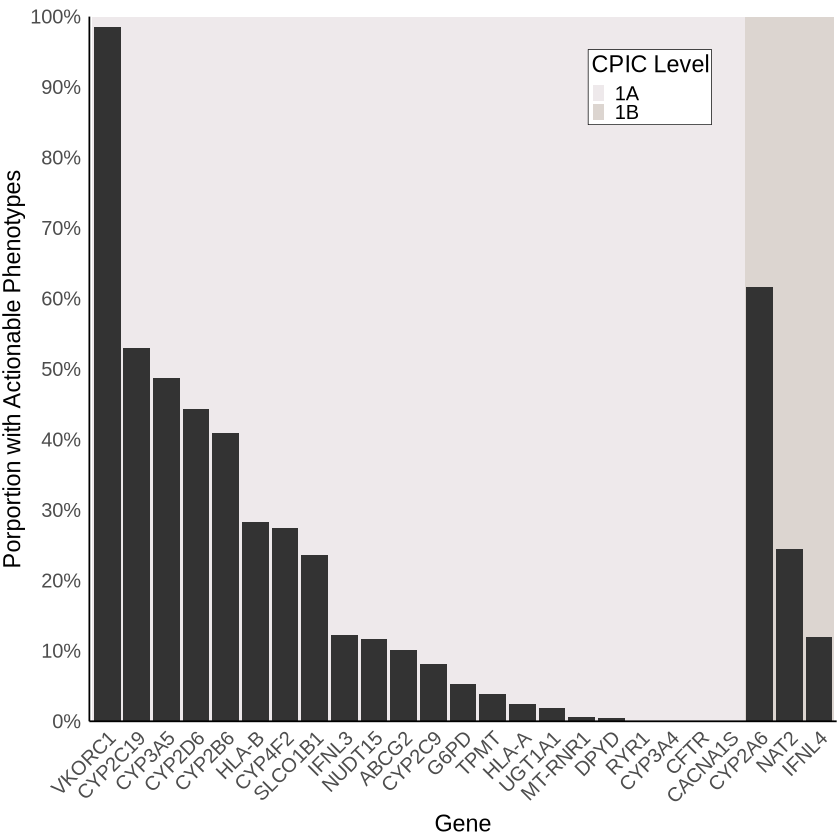

In [4]:
# Create a data frame for ribbon positions
ribbon_data <- gene_act_df %>%
  group_by(annotation_lv) %>%
  summarise(
    xstart = min(as.numeric(Gene)) - 0.5,
    xend = max(as.numeric(Gene)) + 0.5
  )

# Plot bar chart with ribbon backgrounds
per_gene_plot <- ggplot() +
  # Add ribbons for annotation levels
  geom_rect(data = ribbon_data,
            aes(xmin = xstart, xmax = xend,
                ymin = 0, ymax = 1,
                fill = annotation_lv),
            alpha = 0.2) +
  # Add the bars
  geom_bar(data = gene_act_df, 
           aes(x = Gene, y = actionable_rate),
           stat = "identity", fill = "#333333") +
  scale_fill_manual(values = c("1A" = "#aa919b", "1B" = "#502d16")) +
  labs(title = "",
       x = "Gene",
       y = "Porportion with Actionable Phenotypes",
       fill = "CPIC Level") +
  scale_y_continuous(
      labels = scales::percent_format(), 
      breaks = seq(0, 1, by = 0.1),
      limits = c(0, 1),     
      expand = c(0, 0)
  ) +
  # theme_minimal(base_family = "Arial") +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 12),  # Former x-axis text, now on y-axis
    axis.text.x = element_text(angle = 45, size = 12, hjust = 1),  # Former y-axis text, now on x-axis
    plot.title = element_blank(),
    axis.title.y = element_text(size = 14),  # Former x-axis title
    axis.title.x = element_text(size = 14),  # Former y-axis title
    panel.grid = element_blank(), 
    axis.line = element_line(color = "black"), 
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    legend.key.size = unit(0.3, "cm"),
    # legend.position = 'none',
    # legend.position = c(0.95, 0.95),
    # legend.justification = c("right", "top"),
    legend.position.inside = c(0.75, 0.9),  # Position legend in upper right
    legend.position = 'inside',
    legend.box.background = element_rect(color = "black", size = 0.2),
    legend.margin = margin(2, 2, 2, 2),
    # Set fixed plot dimensions
    plot.margin = margin(10, 2, 2, 2)
  )

# Display the plot
per_gene_plot

# # Export the plot to PDF    
# ggsave(
#   filename = "results/pgx/per_gene_actionability.pdf", 
#   plot = per_gene_plot, 
#   width = 83, height = 55,
#   units = "mm", dpi = 600
# )

In [5]:
amp_af_tsv <- "resources/HKGP_PGx_allele-comparison.csv"
amp_af_df <- read.csv(amp_af_tsv, sep = ",", header = TRUE, stringsAsFactors = FALSE)

# Set Gene as a factor
amp_af_df$Gene <- factor(amp_af_df$Gene, levels = unique(amp_af_df$Gene))

In [6]:
hkgp_af <- amp_af_df %>% 
    select(Gene, EastAsian_HKGP_Chinese_altered_af) %>% 
    mutate(group = sprintf("%s_HKGP", Gene)) %>% 
    mutate(group2 = sprintf("%s_HKGP", Gene)) %>% 
    mutate(af_source = "HKGP") %>% 
    mutate(row_number = row_number()-1) %>%
    rename(af = EastAsian_HKGP_Chinese_altered_af)

amp_t1_df <- amp_af_df %>% 
    select(Gene, EastAsian_HKGP_Chinese_AMPtier1_af) %>% 
    mutate(group = sprintf("%s_AMPt1", Gene)) %>% 
    mutate(group2 = sprintf("%s_AMP", Gene)) %>% 
    mutate(af_source = "AMP_tier1") %>% 
    mutate(row_number = row_number()-1) %>% 
    rename(af = EastAsian_HKGP_Chinese_AMPtier1_af)
    
amp_t2_df <- amp_af_df %>% 
    select(Gene, EastAsian_HKGP_Chinese_AMPtier2_af) %>% 
    mutate(group = sprintf("%s_AMPt2", Gene)) %>%
    mutate(group2 = sprintf("%s_AMP", Gene)) %>%  
    mutate(af_source = "AMP_tier2") %>% 
    mutate(row_number = row_number()-1) %>%
    rename(af = EastAsian_HKGP_Chinese_AMPtier2_af)

In [7]:
hkgp_amp_long <- rbind(hkgp_af, amp_t1_df, amp_t2_df)
hkgp_amp_long$group <- factor(hkgp_amp_long$group, levels = unique(hkgp_amp_long$group))
hkgp_amp_long$group2 <- factor(hkgp_amp_long$group2, levels = unique(hkgp_amp_long$group2))
hkgp_amp_long$af_source <- factor(hkgp_amp_long$af_source, levels = c("HKGP", "AMP_tier1", "AMP_tier2"))

head(hkgp_amp_long)

,Gene,af,group,group2,af_source,row_number
,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>
1,VKORC1,0.8846407,VKORC1_HKGP,VKORC1_HKGP,HKGP,0
2,CYP3A5,0.7135659,CYP3A5_HKGP,CYP3A5_HKGP,HKGP,1
3,CYP2D6,0.6747024,CYP2D6_HKGP,CYP2D6_HKGP,HKGP,2
4,CYP2C19,0.3783014,CYP2C19_HKGP,CYP2C19_HKGP,HKGP,3
5,ABCG2,0.3177785,ABCG2_HKGP,ABCG2_HKGP,HKGP,4
6,CYP2B6,0.3039151,CYP2B6_HKGP,CYP2B6_HKGP,HKGP,5


# A tibble: 2 × 3
  clinical_level xstart  xend
  <chr>           <dbl> <dbl>
1 1A             -0.175  21.7
2 1B             21.6    24.7


Warning message:
“Removed 30 rows containing missing values or values outside the scale range (`geom_bar()`).”


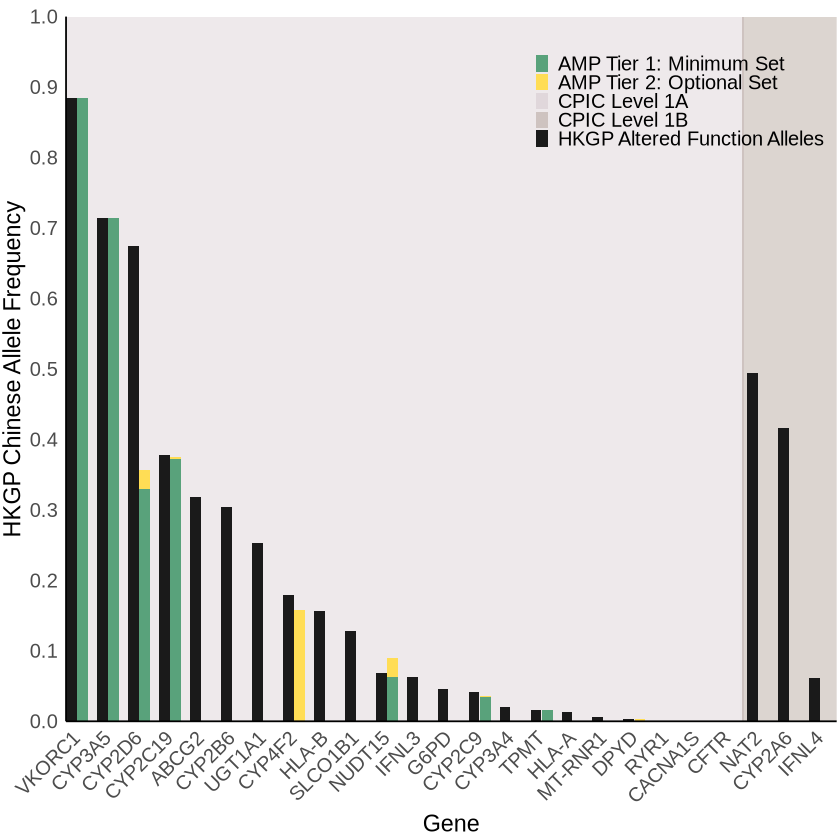

In [8]:
barwidth = 0.35

# Create a data frame for ribbon positions - start from the left edge of first bar
amp_ribbon_data <- amp_af_df %>%
  # First create row numbers for absolute positions
  mutate(absolute_position = row_number() - 1) %>%
  group_by(clinical_level) %>%
  summarise(
    xstart = min(absolute_position) - barwidth,
    xend = max(absolute_position) + barwidth * 2 + 0.01
  ) %>%
  # Adjust the first ribbon to start at -barwidth/2 to be flush with y-axis
  mutate(xstart = ifelse(xstart == min(xstart), -barwidth/2, xstart))

# Print to verify calculations
print(amp_ribbon_data)

# Modify the plot to include ribbons
af_comp_plot <- ggplot() + 
    # Add ribbons for clinical levels
    geom_rect(data = amp_ribbon_data,
            aes(xmin = xstart, xmax = xend,
                ymin = 0, ymax = 1,
                fill = clinical_level),
            alpha = 0.2) +
    geom_bar(data = hkgp_af, 
             mapping = aes(x = row_number, y = af, fill = as.factor(af_source)), 
             stat="identity", 
             position=position_stack(reverse=TRUE), 
             width = barwidth) + 
    geom_bar(data = rbind(amp_t1_df, amp_t2_df), 
             mapping = aes(x = row_number + barwidth + 0.01, y = af, fill = as.factor(af_source)), 
             stat="identity", 
             position=position_stack(reverse=TRUE),
             width = barwidth) + 
    labs(
      x = "Gene",
      y = "HKGP Chinese Allele Frequency", 
      fill = ""
    ) + 
  scale_x_continuous(
      breaks = seq(0, nrow(hkgp_af)-1, by = 1),
      labels = hkgp_af$Gene,
      limits = c(-barwidth/2, nrow(hkgp_af)-1+barwidth*2 + 0.01),  # Start from left edge of first bar
      expand = c(0, 0)  # Remove expansion
  ) +
  scale_y_continuous(
      breaks = seq(0, 1, by = 0.1),  # Set y-axis ticks at 5% intervals
      limits = c(0, 1),     
      expand = c(0, 0)  # Remove space at the bottom of the y-axis
  ) +
  scale_fill_manual(
    labels = c(
      "HKGP" = "HKGP Altered Function Alleles",
      "AMP_tier1" = "AMP Tier 1: Minimum Set", 
      "AMP_tier2" = "AMP Tier 2: Optional Set",
      "1A" = "CPIC Level 1A",
      "1B" = "CPIC Level 1B"
    ), 
    values = c(
      "HKGP" = "#1a1a1a",
      "AMP_tier1" = "#59a27b",
      "AMP_tier2" = "#ffdd55",
      "1A" = "#aa919b",
      "1B" = "#502d14"
    )
  ) +
  # theme_minimal(base_family = "Arial") +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 12), # Use size 5 for publication
    axis.text.x = element_text(angle = 45, size = 12, hjust = 1), # Use size 6 for publication
    plot.title = element_blank(),
    axis.title.y = element_text(size = 14), # Use size 7 for publication
    axis.title.x = element_text(size = 14), # Use size 7 for publication
    panel.grid = element_blank(), 
    axis.line = element_line(color = "black"), 
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 12),
    legend.key.size = unit(0.3, "cm"),
    legend.position.inside = c(0.80, 0.9),  # Position legend in upper right
    legend.position = 'inside',
    plot.margin = margin(10, 2, 2, 2)
  )

af_comp_plot

In [9]:
# # Save the plot to a PDF
# ggsave(
#   filename = "results/pgx/amp_af.pdf",
#   plot = af_comp_plot,
#   width = 102, height = 56,
#   units = "mm", dpi = 600
# )